# Assignment 4
------------------
Useful links:
- TA's hints: Slides 67 and 68. Try to understand that algorithm and implement in this case here.
- assignment description: https://mycourses.aalto.fi/pluginfile.php/1357993/mod_resource/content/6/Assignment_4.pdf

## Exercise 1
------------------
Traffic is modelled as an inhomogeneous Poisson process at a crossing where vehicles
arrive at rates that depend on the time of the day. The rates are measured averages over
time-intervals as follows:

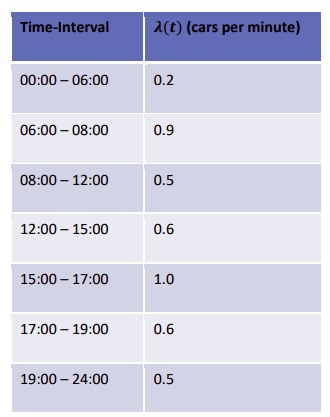

- Implement the two methods that will give the event times in order: the revised method and the 
thinning approach. Simulate the described arrival process using these methods.
- Using both methods, simulate 1000 Poisson processes.
    - For each such simulation, plot the average number of cars that arrived (and obviously left) the crossing per minute over 24 hours.
    - Plot also the cumulative number of cars that arrived per minute over 24 hours.
    - As numerical results, print the average number of cars that arrived in one day and the average time when the first car arrived.

Here, for some of the things you know what you should get, right? This way you can check that your algorithms simulating the inhomogeneous Poisson process work right. These algorithms could then be used for simulating more complicated inhomogeneous Poisson processes.

Please note that in the revised algorithm you need to sample the different numbers of events for
the different realisations of the Poisson process (the first row in the pseudo algorithm:
$m \sim Po(U_{\lambda}T)$. You can use the library function for that: numpy.random.poisson

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

seed = 8102020

# Get lambda_t in the algorithms based on the table given in the exercise description.
def lambda_t(t):
    if 0 <= t < 6*60:
        return 0.2
    elif 6*60 <= t < 8*60:
        return 0.9
    elif 8*60 <= t < 12*60 or 19*60 <= t:
        return 0.5
    elif 12*60 <= t < 15*60 or 17*60 <= t < 19*60:
        return 0.6
    elif 15*60 <= t < 17*60:
        return 1.0

### Revised algorithm

THE REVISED METHOD:


The average number of cars that arrived in one day is 749.337.
The average time when the first car arrived is 4.98 in minutes.



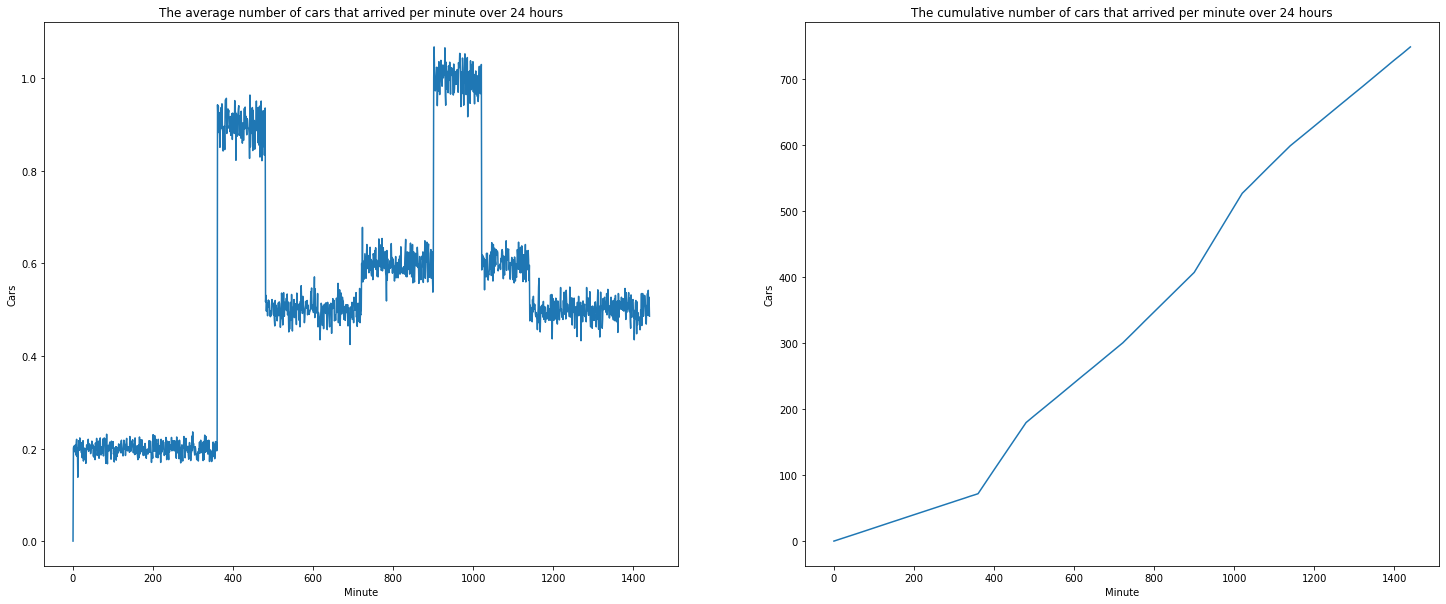

In [3]:
def revised(sims):
    
    ### CONSTANTS ###
    
    T = 24*60 # whole time interval
    U_lambda = 1 # the upper bound of the rate lambda(t)
    
    print("THE REVISED METHOD:\n")
    
    ### INITIALIZE DATA STRUCTURES ###
    
    # Initialize an array where we keep track of each minute how may cars arrive on the minute
    # E.g. for minute we can get the number of cars with cars_per_minute[5]
    cars_per_minute = np.zeros(T+1)
    
    # Keep track of first arrival minute of each simulation
    first_arrivals = []
    
    # Keep track of the total amount of cars per simulation, append here the total amount for each sim
    counts = []
    
    ### SIMULATION ###
    
    for j in range(sims):
        
        ### ALGORITHM ###
        
        m = np.random.poisson(U_lambda*T) # draw m from Poisson distribution.
        x = np.zeros(m+1) # Set x0 = 0
        
        # Store the arriving times in arrivals list
        arrivals = []
        
        # Count the total number of cars arriving
        count = 0
        
        # x[i] is the time when car passes by
        for i in range(1, m+1):
            # sample u
            u = np.random.uniform(0,1)
            # set x_i
            x[i] = x[i-1] + (T - x[i-1]) * (1 - u**(1 / (m-i+1)) )
            # sample y
            y = np.random.uniform(0, U_lambda)
            # compare to lambda_t
            if y <= lambda_t(x[i]):
                arrivals.append(x[i])
                cars_per_minute[math.floor(x[i]) + 1] += 1
                count += 1
        
        # Save the total amount of arrivals of the simulation
        counts.append(count)
         
        # Save the first arrival of the simulation
        first_arrivals.append(min(arrivals))
    
    ### PLOTTING ###
    
    # Take the avergae of cars that arrived per minute for each minute over 24 hours for the plotting task
    cars_per_minute_average = cars_per_minute / sims
    cars_per_minute_cumulative = np.cumsum(cars_per_minute / sims)
    
    fig = plt.figure(figsize=(25,10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.plot(cars_per_minute_average)
    ax1.set_title("The average number of cars that arrived per minute over 24 hours")
    ax1.set_xlabel("Minute")
    ax1.set_ylabel("Cars")
    
    
    ax2.plot(cars_per_minute_cumulative)
    ax2.set_title("The cumulative number of cars that arrived per minute over 24 hours")
    ax2.set_xlabel("Minute")
    ax2.set_ylabel("Cars")
    
    ### NUMERICAL VALUES ###
    
    avg_number_of_cars = np.mean(counts)
    avg_first_arrival = np.mean(first_arrivals)
    print("\nThe average number of cars that arrived in one day is {}.\nThe average time when the first car arrived is {} in minutes.\n".format(avg_number_of_cars, np.round(avg_first_arrival, 2)))
        
    return

revised(sims=1000)

### Thinning algorithm

THE THINNING METHOD:


The average number of cars that arrived in one day is 750.869.
The average time when the first car arrived is 4.94 in minutes.



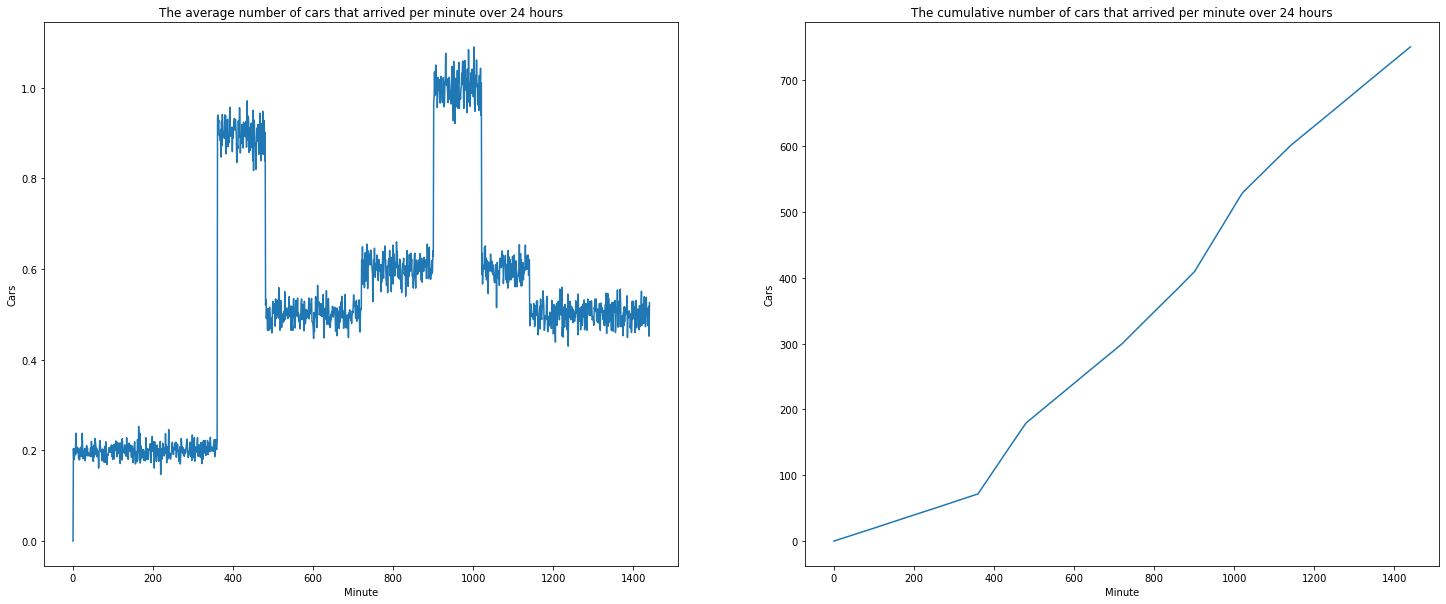

In [4]:
def thinning(sims):
    
    ### CONSTANTS ###
    
    T = 24*60 # whole time interval
    U_lambda = 1 # the upper bound of the rate lambda(t)
    
    print("THE THINNING METHOD:\n")
    
    ### INITIALIZE DATA STRUCTURES ###
       
    # Initialize an array where we keep track of each minute how may cars arrive on the minute
    # E.g. for minute we can get the number of cars with cars_per_minute[5]
    cars_per_minute = np.zeros(T+1)
    
    # Keep track of first arrival minute of each simulation
    first_arrivals = []
    
    # Keep track of the total amount of cars per simulation, append here the total amount for each sim
    counts = []
    
    ### SIMULATION ###
    
    for j in range(sims):

        # Store the arriving times in arrivals list
        arrivals = []
        
        # Count the total number of cars arriving
        count = 0
        
        ### ALGORITHM ###
        
        # Set t_0 = 0
        t = [0]
        i = 1
        stop = False
        while (stop is not True):
            
            # sample t
            t_sample = np.random.exponential(U_lambda)
            #set t_i
            t.append(t[i-1] + t_sample)
            # if t_i > T, stop
            if (t[i] > T):
                stop = True
                continue
                
            # sample u
            u = np.random.uniform(0, 1)
            
            # compare u and lambda_t/U_lambda
            if u <= (lambda_t(t[i]) / U_lambda):
                arrivals.append(t[i])
                cars_per_minute[math.floor(t[i]) + 1] += 1
                count += 1
            i += 1
        
        # Save the total amount of arrivals of the simulation
        counts.append(count)
         
        # Save the first arrival of the simulation
        first_arrivals.append(min(arrivals))
    
    ### PLOTTING ###
    
    # Take the avergae of cars that arrived per minute for each minute over 24 hours for the plotting task    
    cars_per_minute_average = cars_per_minute / sims
    cars_per_minute_cumulative = np.cumsum(cars_per_minute / sims)
    
    fig = plt.figure(figsize=(25,10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.plot(cars_per_minute_average)
    ax1.set_title("The average number of cars that arrived per minute over 24 hours")
    ax1.set_xlabel("Minute")
    ax1.set_ylabel("Cars")
    
    
    ax2.plot(cars_per_minute_cumulative)
    ax2.set_title("The cumulative number of cars that arrived per minute over 24 hours")
    ax2.set_xlabel("Minute")
    ax2.set_ylabel("Cars")
    
    ### NUMERICAL VALUES ###
    
    avg_number_of_cars = np.mean(counts)
    avg_first_arrival = np.mean(first_arrivals)
    print("\nThe average number of cars that arrived in one day is {}.\nThe average time when the first car arrived is {} in minutes.\n".format(avg_number_of_cars, np.round(avg_first_arrival, 2)))
        
    return

thinning(sims=1000)